C1 = 1.3333333333333333
C2 = 0
C3 = 4.666666666666667
C4 = -4


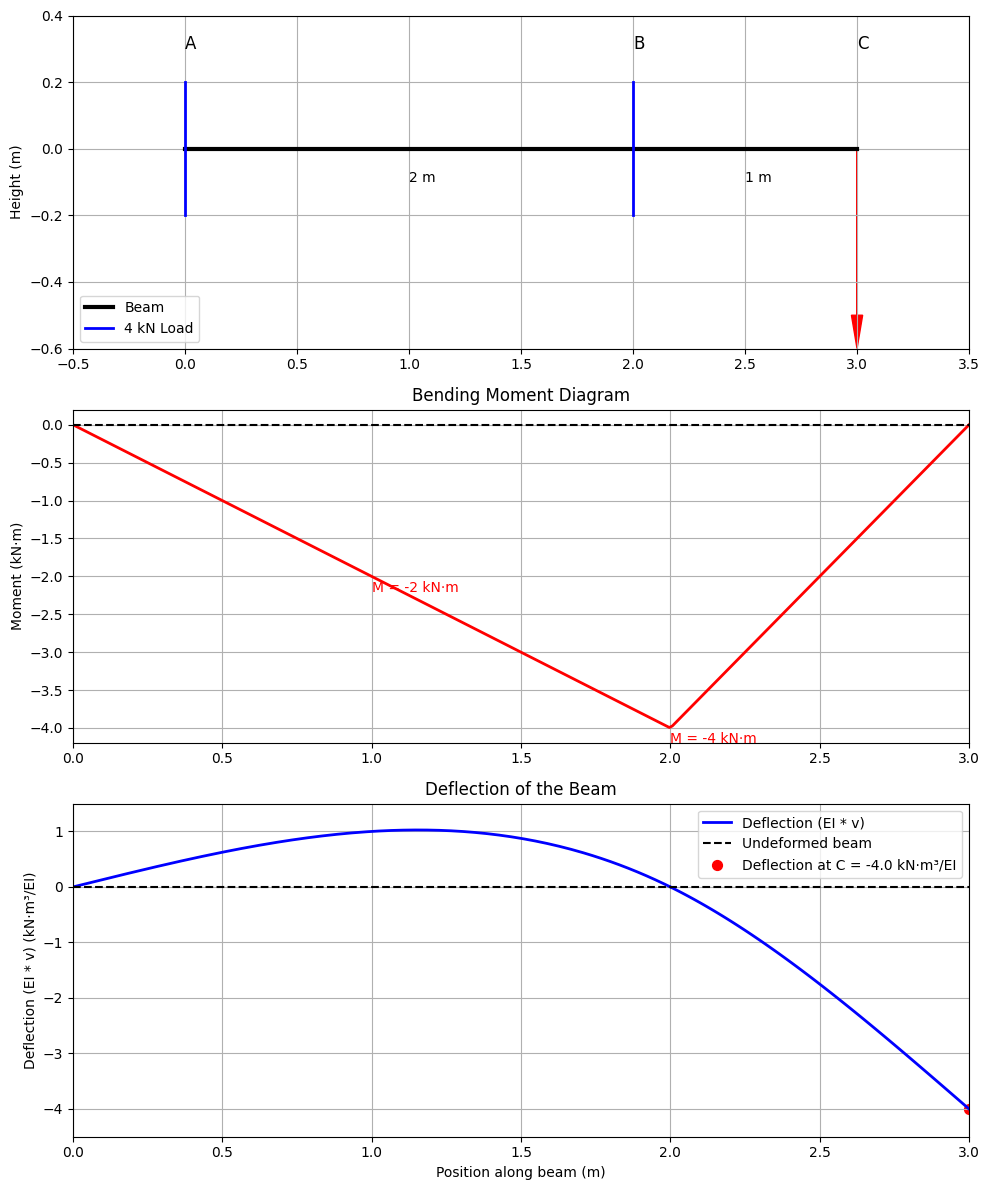

The deflection at C is v_C = -4.0 kN·m³/EI


In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define constants
C1 = 4/3
C2 = 0
C3 = 14/3
C4 = -4

print(f"C1 = {C1}")
print(f"C2 = {C2}")
print(f"C3 = {C3}")
print(f"C4 = {C4}")

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot 1: Beam Schematic
ax1.plot([0, 3], [0, 0], 'k-', linewidth=3, label='Beam')
ax1.plot([0, 0], [-0.2, 0.2], 'b-', linewidth=2)  # Roller at A
ax1.plot([2, 2], [-0.2, 0.2], 'b-', linewidth=2)  # Roller at B
ax1.arrow(3, 0, 0, -0.5, head_width=0.05, head_length=0.1, fc='r', ec='r')  # Load at C
ax1.text(0, 0.3, 'A', fontsize=12)
ax1.text(2, 0.3, 'B', fontsize=12)
ax1.text(3, 0.3, 'C', fontsize=12)
ax1.text(1, -0.1, '2 m', fontsize=10)
ax1.text(2.5, -0.1, '1 m', fontsize=10)
ax1.set_ylabel('Height (m)')
ax1.grid(True)
ax1.set_xlim(-0.5, 3.5)
ax1.set_ylim(-0.6, 0.4)
ax1.legend(['Beam', '4 kN Load'])

# Plot 2: Moment Diagram
# Create a fine mesh for smooth plotting
x = np.linspace(0, 3, 300)
M = np.zeros_like(x)

# For segment AB (0 ≤ x ≤ 2)
mask_AB = x <= 2
M[mask_AB] = -2 * x[mask_AB]  # M₁ = -2x₁

# For segment BC (2 ≤ x ≤ 3)
mask_BC = x > 2
M[mask_BC] = -4 * (3 - x[mask_BC])  # M₂ = -4x₂, where x₂ = 3-x

ax2.plot(x, M, 'r-', linewidth=2)
ax2.plot([0, 3], [0, 0], 'k--')  # Zero moment line
ax2.set_title('Bending Moment Diagram')
ax2.set_ylabel('Moment (kN·m)')
ax2.grid(True)
ax2.set_xlim(0, 3)

# Add annotations for moment values
ax2.text(1, -2.2, 'M = -2 kN·m', color='r', fontsize=10)
ax2.text(2, -4.2, 'M = -4 kN·m', color='r', fontsize=10)

# Plot 3: Deflection Curve
# We need to calculate the deflection separately for each segment
# and ensure continuity at the boundary

# For segment AB (0 ≤ x ≤ 2)
x1 = np.linspace(0, 2, 200)
v1 = -(1/3) * x1**3 + C1 * x1 + C2

# For segment BC (2 ≤ x ≤ 3)
x2_global = np.linspace(2, 3, 100)
x2 = 3 - x2_global  # Convert to local coordinates (x₂ measured from C)
v2 = -(2/3) * x2**3 + C3 * x2 + C4

# Plot each segment
ax3.plot(x1, v1, 'b-', linewidth=2)
ax3.plot(x2_global, v2, 'b-', linewidth=2, label='Deflection (EI * v)')
ax3.plot([0, 3], [0, 0], 'k--', label='Undeformed beam')
ax3.scatter([3], [-4], color='red', s=50, label=f'Deflection at C = -4.0 kN·m³/EI')
ax3.set_title('Deflection of the Beam')
ax3.set_xlabel('Position along beam (m)')
ax3.set_ylabel('Deflection (EI * v) (kN·m³/EI)')
ax3.grid(True)
ax3.legend()
ax3.set_xlim(0, 3)
ax3.set_ylim(-4.5, 1.5)

plt.tight_layout()
plt.show()

# Print the deflection at C
print(f"The deflection at C is v_C = -4.0 kN·m³/EI")